In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [32]:
df=pd.read_excel('C:/Simo/Work/Formazione personale/Python/Data analysis/Roorkee/Data/13 Premier League - Copia - Copia.xlsx')
df

,squadra,valsquadra,fatturato,monteing,vittoriacamp
0,Arsenal,370.50,481.500,231.00,1
1,Man Utd,378.50,518.000,300.00,1
2,Chelsea,395.75,440.500,268.00,1
3,Swansea,121.00,121.300,65.95,0
4,Norwich,88.00,120.589,47.85,0
5,Leicester,98.00,135.000,62.60,1
6,Stoke City,94.00,117.600,93.60,0
7,West Ham,96.70,137.400,90.00,0
8,Liverpool,282.00,305.900,200.00,1
9,Crystal Palace,75.00,124.000,70.22,0


In [38]:
df.describe()

,valsquadra,fatturato,monteing,vittoriacamp
count,20.000000,20.000000,20.000000,20.000000
mean,178.372500,207.874450,122.988500,0.600000
std,128.221432,139.745731,84.707543,0.502625
min,55.000000,95.000000,32.400000,0.000000
25%,92.500000,123.325000,69.152500,0.000000
50%,106.875000,134.000000,91.000000,1.000000
75%,274.125000,238.325000,154.250000,1.000000
max,451.000000,518.000000,300.000000,1.000000


In [39]:
df['vittoriacamp'].unique()

array([1, 0], dtype=int64)

In [40]:
df['vittoriacamp'].value_counts()

1    12
0     8
Name: vittoriacamp, dtype: int64

In [41]:
8/12 #using baseline method

0.6666666666666666

In [42]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [43]:
x=df[['valsquadra','fatturato','monteing']]
y=df['vittoriacamp']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [44]:
len(x_train),len(x_test),len(y_train),len(y_test)

(15, 5, 15, 5)

In [45]:
Lreg=LogisticRegression(solver='lbfgs')
Lreg.fit(x_train,y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_predict=Lreg.predict(x_test)
y_predict

array([1, 0, 1, 1, 1], dtype=int64)

In [47]:
y_predict_train=Lreg.predict(x_train)
y_predict_train


array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

In [48]:
y_prob_train=Lreg.predict_proba(x_train)[:,1]
y_prob_train.reshape(-1,1)

array([[5.61478890e-01],
       [1.21085471e-04],
       [3.42438293e-01],
       [3.93906963e-01],
       [9.98701884e-01],
       [9.98185220e-01],
       [1.00000000e+00],
       [7.72215453e-02],
       [6.50333961e-01],
       [5.19041340e-02],
       [1.00000000e+00],
       [7.74956511e-01],
       [1.00000000e+00],
       [2.49827927e-02],
       [1.25840879e-01]])

In [49]:
y_prob=Lreg.predict_proba(x_test)[:,1]
y_prob.reshape(-1,1)
y_prob

array([1.        , 0.2066132 , 0.50688395, 1.        , 1.        ])

In [33]:
x=df[['valsquadra','fatturato','monteing']]
y=df['vittoriacamp']

import statsmodels.api as sm
x1=sm.add_constant(x)
logit_model=sm.Logit(y,x1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.281840
         Iterations 12
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.581    
Dependent Variable: vittoriacamp     AIC:              19.2736  
Date:               2020-05-11 17:57 BIC:              23.2565  
No. Observations:   20               Log-Likelihood:   -5.6368  
Df Model:           3                LL-Null:          -13.460  
Df Residuals:       16               LLR p-value:      0.0013396
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     12.0000                                     
-----------------------------------------------------------------
             Coef.    Std.Err.     z     P>|z|    [0.025   0.975]
-----------------------------------------------------------------
const       -25.5794   15.4910  -1.6512  0.0987  -55.9412  4.7824
valsquadra   -0.0069    0.0469  -0.1463  0.8837   -0.0987  0.0850
fattura

In [34]:
import scipy
from scipy.stats import chi2

In [35]:
chi2.pdf((2*(-5.6368-(-13.460))),3)

0.000631749183640058

ACCURACY OF THE MODEL

In [51]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_predict)
score

0.6

CONFUSION MATRIX

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[0, 1],
       [1, 3]], dtype=int64)

In [54]:
tn,fp,fn,tp=confusion_matrix(y_test,y_predict).ravel()
print("True negative: ",tn)
print("False positive: ",fp)
print("False negative: ",fn)
print("True positive: ",tp)

True negative:  0
False positive:  1
False negative:  1
True positive:  3


In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      0.75      0.75         4

    accuracy                           0.60         5
   macro avg       0.38      0.38      0.38         5
weighted avg       0.60      0.60      0.60         5



In [56]:
accuracy=(tp+tn)/(tp+tn+fp+fn)
print(accuracy)

0.6


In [57]:
#true_negative_rate=specificity
specificity=tn/(tn+fp)
print(specificity)

0.0


In [59]:
#true positive rate=sensitivity
sensitivity=tp/(tp+fn)
print(sensitivity)

0.75


ROC CURVE

In [61]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
log_ROC_AUC1 = roc_auc_score(y_train,y_predict_train)
fpr1,tpr1,thresholds1=roc_curve(y_train,y_prob_train)
roc_auc1=auc(fpr1,tpr1)

<function matplotlib.pyplot.show(*args, **kw)>

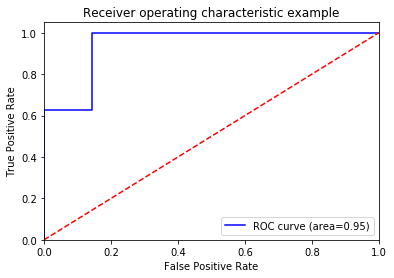

In [62]:
plt.figure()
plt.plot(fpr1,tpr1,color="blue",label="ROC curve (area=%0.2f)" % roc_auc1)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show

In [63]:
log_ROC_AUC = roc_auc_score(y_test,y_predict)
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc=auc(fpr,tpr)

In [65]:
fpr

array([0., 0., 1., 1.])

In [66]:
tpr

array([0.  , 0.75, 0.75, 1.  ])

<function matplotlib.pyplot.show(*args, **kw)>

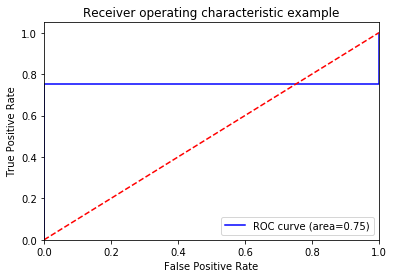

In [67]:
plt.figure()
plt.plot(fpr,tpr,color="blue",label="ROC curve (area=%0.2f)" % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show

FIND OPTIMAL CUTOFF POINT (THRESHOLD VALUE)

In [81]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc=auc(fpr,tpr)

In [84]:
print("Area under the ROC curve: %f" % roc_auc)

Area under the ROC curve: 0.750000


In [83]:
import numpy as np
i=np.arange(len(tpr))
roc=pd.DataFrame({'fpr': pd.Series(fpr,index=i),'tpr':pd.Series(tpr,index=i),
                 '1-fpr': pd.Series(1-fpr,index=i), 'tf' : pd.Series(tpr - (1-fpr), index=i),
                 'thresholds': pd.Series(thresholds,index=i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
1,0.0,0.75,1.0,-0.25,1.0


[]

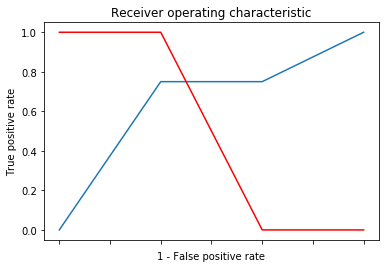

In [85]:
fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'],color="red")
plt.xlabel("1 - False positive rate")
plt.ylabel("True positive rate")
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])